In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\SRINI\Downloads\archive (1)\time_series_data_human_activities.csv")
dataset_size = df.shape[0]
print(f"Dataset Size: {dataset_size} samples")
labels = df.iloc[:, -1].values
unique_labels = pd.unique(labels)
num_classes = len(unique_labels)
print(f"Number of Classes: {num_classes}")
print("Unique Class Labels:", unique_labels)

Dataset Size: 1073623 samples
Number of Classes: 2110
Unique Class Labels: [ -2.03      -0.5       -0.69     ...  18.768839 -17.965239 -17.311462]


Epoch 1/10
21473/21473 [==============================] - 108s 5ms/step - loss: 6.3128 - accuracy: 0.0124 - val_loss: 6.1164 - val_accuracy: 0.0157
Epoch 2/10
21473/21473 [==============================] - 107s 5ms/step - loss: 5.9976 - accuracy: 0.0172 - val_loss: 5.9380 - val_accuracy: 0.0182
Epoch 3/10
21473/21473 [==============================] - 96s 4ms/step - loss: 5.8634 - accuracy: 0.0188 - val_loss: 5.8556 - val_accuracy: 0.0189
Epoch 4/10
21473/21473 [==============================] - 101s 5ms/step - loss: 5.7986 - accuracy: 0.0195 - val_loss: 5.8210 - val_accuracy: 0.0188
Epoch 5/10
21473/21473 [==============================] - 109s 5ms/step - loss: 5.7643 - accuracy: 0.0199 - val_loss: 5.7982 - val_accuracy: 0.0197
Epoch 6/10
21473/21473 [==============================] - 110s 5ms/step - loss: 5.7441 - accuracy: 0.0201 - val_loss: 5.7889 - val_accuracy: 0.0186
Epoch 7/10
21473/21473 [==============================] - 100s 5ms/step - loss: 5.7306 - accuracy: 0.0202 - val_l

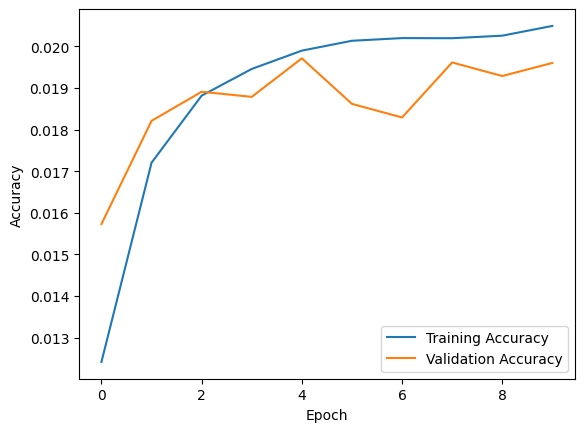

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
data = pd.read_csv(r"C:\Users\SRINI\Downloads\archive (1)\time_series_data_human_activities.csv")
categorical_column_names = data.select_dtypes(exclude=['number']).columns.tolist()
if not categorical_column_names:
    raise ValueError("No non-numeric columns found in the DataFrame.")
X = pd.get_dummies(data.iloc[:, :-1], columns=categorical_column_names).values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data.iloc[:, -1].values)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 10 
batch_size = 32
history = model.fit(X_train, y_train_categorical, epochs=epochs, batch_size=batch_size, validation_split=0.2)
_, accuracy = model.evaluate(X_test, y_test_categorical)
print(f"Model Accuracy: {accuracy:.2f}")
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Classification Report:
              precision    recall  f1-score   support

  Downstairs       0.87      0.82      0.84     20129
     Jogging       0.94      0.93      0.93     65138
     Sitting       1.00      1.00      1.00     12099
    Standing       0.99      0.99      0.99      9591
    Upstairs       0.87      0.84      0.86     24350
     Walking       0.92      0.95      0.94     83418

    accuracy                           0.92    214725
   macro avg       0.93      0.92      0.93    214725
weighted avg       0.92      0.92      0.92    214725

Precision Scores for Each Class:
[0.86810514 0.93917807 0.99942082 0.99268853 0.87312187 0.92082074]


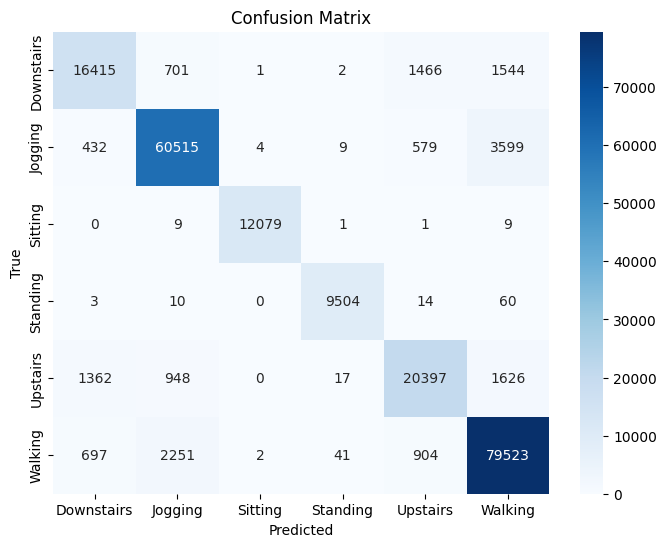

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
csv_file_path = r"C:\Users\SRINI\Downloads\archive (1)\time_series_data_human_activities.csv"
df = pd.read_csv(csv_file_path)
X = df[['timestamp', 'x-axis', 'y-axis', 'z-axis']]
y = df['activity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
precision_scores = precision_score(y_test, y_pred, average=None)
print("Precision Scores for Each Class:")
print(precision_scores)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [5]:
import pandas as pd
csv_file_path =( r"C:\Users\SRINI\Downloads\archive (1)\time_series_data_human_activities.csv")
df = pd.read_csv(csv_file_path)
print(df.columns)
image_column_name = 'activity'
image_path = df[image_column_name].iloc[0]
print(image_path)

Index(['user', 'activity', 'timestamp', 'x-axis', 'y-axis', 'z-axis'], dtype='object')
Walking
